In [ ]:
# !pip install datasets
# !pip install numpy
# !pip install matplotlib
# !pip install scikit-learn
# !pip install tensorflow
# !pip install Pillow
# !pip install opencv-python

In [ ]:
import os
from datasets import load_dataset
import shutil
import random
import numpy as np
from PIL import Image
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# from tensorflow.keras.preprocessing import image

In [ ]:
# class DatasetReceipt:

# #huggingface indonesian style
# #huggingface international style tapi bahasa indonesia
# #os local yang handwritten

<PIL.PngImagePlugin.PngImageFile image mode=RGB size=864x1296 at 0x7CA529B80790>


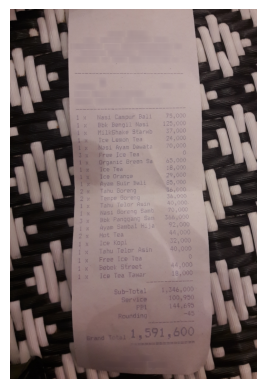

Map:   0%|          | 0/800 [00:00<?, ? examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

<PIL.PngImagePlugin.PngImageFile image mode=L size=600x600 at 0x7CA5BC518DD0>


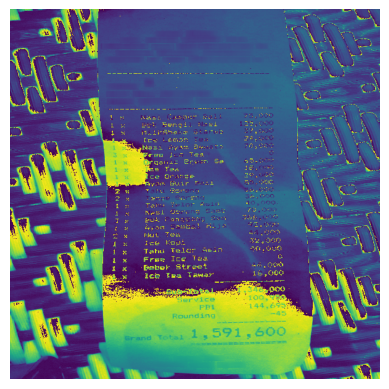

In [ ]:
dataset = load_dataset("naver-clova-ix/cord-v2")
sample_image = dataset['train'][0]['image']
print(sample_image)

plt.imshow(sample_image)
plt.axis("off")
plt.show()

mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])

def resize_image(image):
    """ Convert PIL image to NumPy array and resize """
    if isinstance(image, Image.Image):  # Jika image berupa PIL.Image, konversi ke NumPy array
        image = np.array(image)

    if not isinstance(image, np.ndarray):
        raise ValueError("resize_image: Input harus berupa NumPy array")

    return cv2.resize(image, (600, 600))

def grey_image(image):
    """ Convert image to grayscale """
    if isinstance(image, Image.Image):
        image = np.array(image)

    if not isinstance(image, np.ndarray):
        raise ValueError("grey_image: Input harus berupa NumPy array")

    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

def normalize_image(image):
    """ Normalize image using mean and std """
    if isinstance(image, Image.Image):
        image = np.array(image)

    if not isinstance(image, np.ndarray):
        raise ValueError("normalize_image: Input harus berupa NumPy array")

    image = image / 255.0
    image = (image - mean) / std

    return Image.fromarray((image * 255).astype(np.uint8))  # Kembalikan ke PIL image

def preprocess(batch):
    try:
        batch['image'] = [resize_image(img) for img in batch['image']]
        batch['image'] = [grey_image(img) for img in batch['image']]
        batch['image'] = [normalize_image(img) for img in batch['image']]

        return batch

    except Exception as e:
        print(f"Error dalam preprocess: {e}")
        return batch  # Supaya tidak crash

dataset = dataset.map(preprocess, batched=True, num_proc=1)  # Gunakan num_proc=1 dulu

sample_image_normalization = dataset['train'][0]['image']
print(sample_image_normalization)

plt.imshow(sample_image_normalization)
plt.axis("off")
plt.show()

README.md:   0%|          | 0.00/1.04k [00:00<?, ?B/s]

(…)-00000-of-00001-a5c51039eab2980a.parquet:   0%|          | 0.00/167M [00:00<?, ?B/s]

(…)-00000-of-00001-b8a5c4a6237baf25.parquet:   0%|          | 0.00/19.9M [00:00<?, ?B/s]

(…)-00000-of-00001-56af6bd5ff7eb34d.parquet:   0%|          | 0.00/10.4M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/425 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/50 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/26 [00:00<?, ? examples/s]

<PIL.TiffImagePlugin.TiffImageFile image mode=I size=600x600 at 0x7CA529B3FA10>


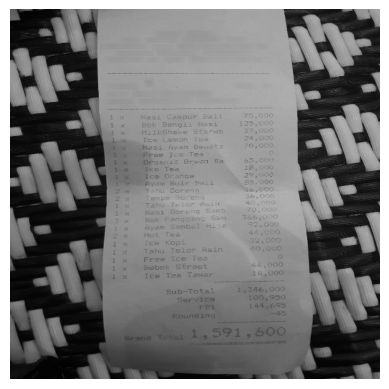

Map:   0%|          | 0/800 [00:00<?, ? examples/s]

Error dalam preprocess: OpenCV(4.11.0) /io/opencv/modules/imgproc/src/color.simd_helpers.hpp:92: error: (-15:Bad number of channels) in function 'cv::impl::{anonymous}::CvtHelper<VScn, VDcn, VDepth, sizePolicy>::CvtHelper(cv::InputArray, cv::OutputArray, int) [with VScn = cv::impl::{anonymous}::Set<3, 4>; VDcn = cv::impl::{anonymous}::Set<1>; VDepth = cv::impl::{anonymous}::Set<0, 2, 5>; cv::impl::{anonymous}::SizePolicy sizePolicy = cv::impl::<unnamed>::NONE; cv::InputArray = const cv::_InputArray&; cv::OutputArray = const cv::_OutputArray&]'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1



Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Error dalam preprocess: OpenCV(4.11.0) /io/opencv/modules/imgproc/src/color.simd_helpers.hpp:92: error: (-15:Bad number of channels) in function 'cv::impl::{anonymous}::CvtHelper<VScn, VDcn, VDepth, sizePolicy>::CvtHelper(cv::InputArray, cv::OutputArray, int) [with VScn = cv::impl::{anonymous}::Set<3, 4>; VDcn = cv::impl::{anonymous}::Set<1>; VDepth = cv::impl::{anonymous}::Set<0, 2, 5>; cv::impl::{anonymous}::SizePolicy sizePolicy = cv::impl::<unnamed>::NONE; cv::InputArray = const cv::_InputArray&; cv::OutputArray = const cv::_OutputArray&]'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1



Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Error dalam preprocess: OpenCV(4.11.0) /io/opencv/modules/imgproc/src/color.simd_helpers.hpp:92: error: (-15:Bad number of channels) in function 'cv::impl::{anonymous}::CvtHelper<VScn, VDcn, VDepth, sizePolicy>::CvtHelper(cv::InputArray, cv::OutputArray, int) [with VScn = cv::impl::{anonymous}::Set<3, 4>; VDcn = cv::impl::{anonymous}::Set<1>; VDepth = cv::impl::{anonymous}::Set<0, 2, 5>; cv::impl::{anonymous}::SizePolicy sizePolicy = cv::impl::<unnamed>::NONE; cv::InputArray = const cv::_InputArray&; cv::OutputArray = const cv::_OutputArray&]'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1

<PIL.TiffImagePlugin.TiffImageFile image mode=I size=600x600 at 0x7CA6235CB2D0>


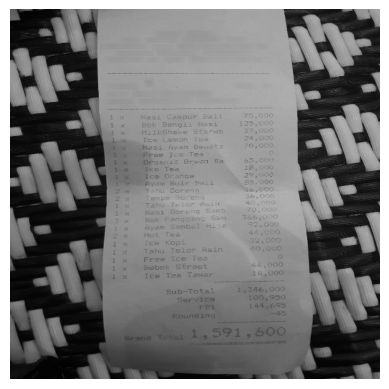

In [ ]:
dataset_international = load_dataset("katanaml-org/invoices-donut-data-v1")
sample_image_international = dataset['train'][0]['image']
print(sample_image_international)

plt.imshow(sample_image_international)
plt.axis("off")
plt.show()

mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])

def resize_image(image):
    """ Convert PIL image to NumPy array and resize """
    if isinstance(image, Image.Image):  # Jika image berupa PIL.Image, konversi ke NumPy array
        image = np.array(image)

    if not isinstance(image, np.ndarray):
        raise ValueError("resize_image: Input harus berupa NumPy array")

    return cv2.resize(image, (600, 600))

def grey_image(image):
    """ Convert image to grayscale """
    if isinstance(image, Image.Image):
        image = np.array(image)

    if not isinstance(image, np.ndarray):
        raise ValueError("grey_image: Input harus berupa NumPy array")

    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

def normalize_image(image):
    """ Normalize image using mean and std """
    if isinstance(image, Image.Image):
        image = np.array(image)

    if not isinstance(image, np.ndarray):
        raise ValueError("normalize_image: Input harus berupa NumPy array")

    image = image / 255.0
    image = (image - mean) / std

    return Image.fromarray((image * 255).astype(np.uint8))  # Kembalikan ke PIL image

def preprocess(batch):
    try:
        batch['image'] = [resize_image(img) for img in batch['image']]
        batch['image'] = [grey_image(img) for img in batch['image']]
        batch['image'] = [normalize_image(img) for img in batch['image']]

        return batch
    except Exception as e:
        print(f"Error dalam preprocess: {e}")
        return batch  # Supaya tidak crash

dataset = dataset.map(preprocess, batched=True, num_proc=1)  # Gunakan num_proc=1 dulu

sample_image_international_normalization = dataset_international['train'][0]['image']
print(sample_image_international_normalization)

plt.imshow(sample_image_international_normalization)
plt.axis("off")
plt.show()